In [ ]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import numpy as np
from PIL import Image


path = "ROIs1158_spring/s2_24/ROIs1158_spring_s2_24_p30.tif"

Source CRS:EPSG:32737, Source Transform:| 10.00, 0.00, 375412.34|
| 0.00,-10.00, 8116742.84|
| 0.00, 0.00, 1.00|


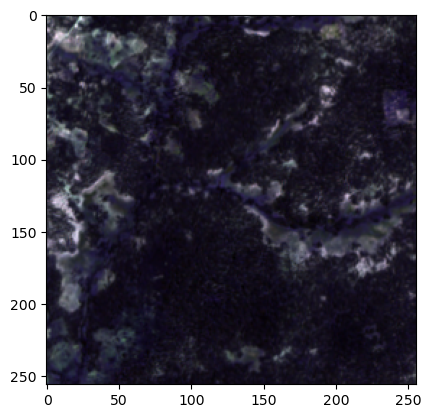

In [6]:
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
import numpy as np
import torch
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# bands 1, 2, 3 = R G B
path = "C:/Users/Paddy/CRT/Github/input/SEN12MS/ROIs1158_spring/s2_1/ROIs1158_spring_s2_1_p30.tif"
path1 = "C:/Users/Paddy/CRT/Github/met/generated_images/tif_example.tif"

src = rasterio.open(path)

# Extract spatial metadata
input_crs = src.crs
input_gt  = src.transform

print(f"Source CRS:{input_crs}, Source Transform:{input_gt}")

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
blue = src.read(4).astype(np.int32)
green = src.read(3).astype(np.int32)
red = src.read(2).astype(np.int32)

# Normalize band DN
nir_norm = normalize(blue)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((red_norm, nir_norm, green_norm))

# View the color composite
plt.imshow(nrg)